In [1]:
import torch
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    #change data to a tensor with value 0-1 
    transform=ToTensor()
)

38391
44951
29855
50582
58227
56623
47740
42927
44558


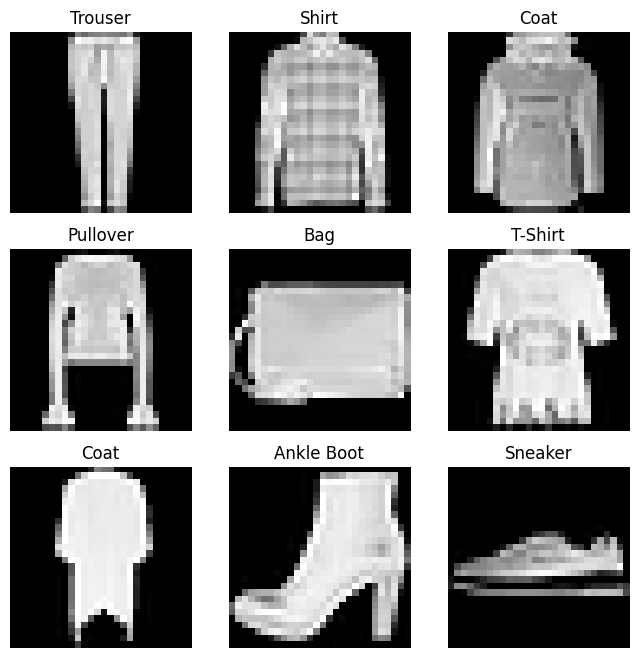

In [3]:
labels_map = {
0: "T-Shirt",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data),size=(1,)).item()
    print(sample_idx)

    img, label = training_data[sample_idx]
    # print(img)
    
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [4]:
from torch.utils.data import DataLoader


train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


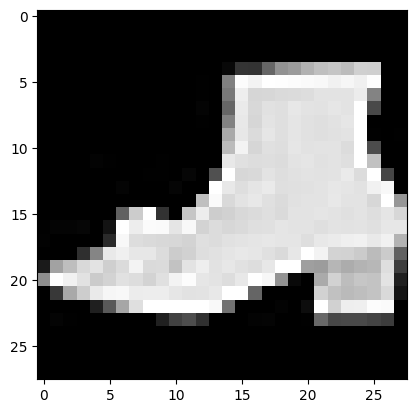

Label: 9


In [5]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [6]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512,10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [8]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


tensor([[ 0.0624,  0.1002, -0.0720, -0.0538, -0.1180, -0.0902,  0.0306, -0.0323,
         -0.0384, -0.0192]], grad_fn=<AddmmBackward0>)
Predicted class: tensor([1])


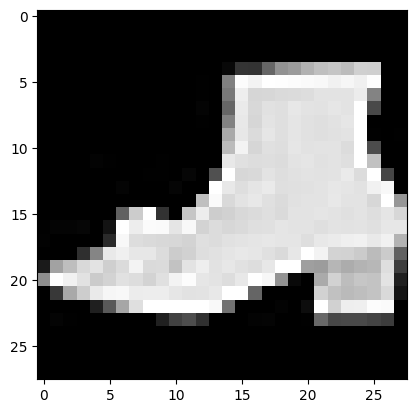

In [9]:
X = torch.rand(1, 28, 28, device=device)
X=train_features[0]
img = X.squeeze()
plt.imshow(img, cmap="gray")
# plt.show()
# print(X)
logits = model(X)
print(logits)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")


In [10]:
learning_rate = 1e-3
batch_size = 60
epochs = 5

In [11]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [12]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [13]:
#main function
if __name__ == "__main__":
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    epochs = 10
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train_loop(train_dataloader, model, loss_fn, optimizer)
        test_loop(test_dataloader, model, loss_fn)
    print("Done!")

Epoch 1
-------------------------------
loss: 2.305973  [   64/60000]


loss: 2.308459  [ 6464/60000]
loss: 2.287055  [12864/60000]
loss: 2.267539  [19264/60000]
loss: 2.248783  [25664/60000]
loss: 2.210601  [32064/60000]
loss: 2.216041  [38464/60000]
loss: 2.215676  [44864/60000]
loss: 2.191708  [51264/60000]
loss: 2.173184  [57664/60000]
Test Error: 
 Accuracy: 43.6%, Avg loss: 2.161847 

Epoch 2
-------------------------------
loss: 2.186070  [   64/60000]
loss: 2.154232  [ 6464/60000]
loss: 2.106461  [12864/60000]
loss: 2.134083  [19264/60000]
loss: 2.060612  [25664/60000]
loss: 2.086947  [32064/60000]
loss: 1.985871  [38464/60000]
loss: 1.962076  [44864/60000]
loss: 1.982146  [51264/60000]
loss: 1.922956  [57664/60000]
Test Error: 
 Accuracy: 56.1%, Avg loss: 1.901815 

Epoch 3
-------------------------------
loss: 1.886625  [   64/60000]
loss: 1.894104  [ 6464/60000]
loss: 1.787723  [12864/60000]
loss: 1.834884  [19264/60000]
loss: 1.794273  [25664/60000]
loss: 1.755542  [32064/60000]
loss: 1.676066  [38464/60000]
loss: 1.669845  [44864/60000]
loss: 